In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
dat_pred = pd.read_csv('dat_pred.csv')
dat_pred.set_index('label',inplace=True)
dat_pred

,2016-01-01 00:00:00,2016-01-01 01:00:00,2016-01-01 02:00:00,2016-01-01 03:00:00,2016-01-01 04:00:00,2016-01-01 05:00:00,2016-01-01 06:00:00,2016-01-01 07:00:00,2016-01-01 08:00:00,2016-01-01 09:00:00,...,2016-04-19 14:00:00,2016-04-19 15:00:00,2016-04-19 16:00:00,2016-04-19 17:00:00,2016-04-19 18:00:00,2016-04-19 19:00:00,2016-04-19 20:00:00,2016-04-19 21:00:00,2016-04-19 22:00:00,2016-04-19 23:00:00
label,,,,,,,,,,,,,,,,,,,,,
0,61.873220,49.990104,44.570139,41.803168,40.641710,42.821441,48.956424,52.547396,61.527604,72.449002,...,69.143273,75.656382,91.246292,111.260064,100.217029,97.945312,95.725106,86.971133,81.889831,59.005297
1,68.859574,57.966499,53.056144,52.190148,50.031250,48.941472,49.696041,47.935911,50.391155,56.842360,...,54.629541,48.239844,52.168750,69.911914,80.749023,81.361523,94.566602,98.646680,104.058008,92.462891
2,64.163450,71.818857,62.878906,61.840227,62.133502,69.336703,81.362439,101.130515,114.178615,110.524203,...,39.398026,35.428865,46.998355,40.039885,57.417352,74.376234,71.671053,65.210938,66.986020,36.548109
3,52.838661,42.563790,43.763188,38.996560,41.146466,38.483945,38.754408,44.410981,52.373280,54.531537,...,44.121277,47.579773,54.371826,69.906738,105.550293,114.797180,108.977539,110.336060,83.884888,65.273926
4,94.670573,85.461263,55.282878,44.813802,113.249674,111.484049,74.604818,71.102865,77.427572,98.029785,...,64.653764,62.509233,53.334517,49.213778,99.255682,97.951349,103.032315,85.398793,82.215199,63.832031


In [3]:
# change k(0,1,2,3,4) for different clusters
# see how neural network performs on each cluster
k = 3

In [4]:
df = pd.DataFrame({'value':dat_pred.iloc[k,:].transpose()})

In [5]:
# # prediction without clustering
# # uncomment this cell and run the notebook if you want to see how clustering helps improving accuracy
# df = pd.DataFrame({'value':dat_pred.apply(np.sum,0)})

In [6]:
df

,value
2016-01-01 00:00:00,52.838661
2016-01-01 01:00:00,42.563790
2016-01-01 02:00:00,43.763188
2016-01-01 03:00:00,38.996560
2016-01-01 04:00:00,41.146466
...,...
2016-04-19 19:00:00,114.797180
2016-04-19 20:00:00,108.977539
2016-04-19 21:00:00,110.336060
2016-04-19 22:00:00,83.884888


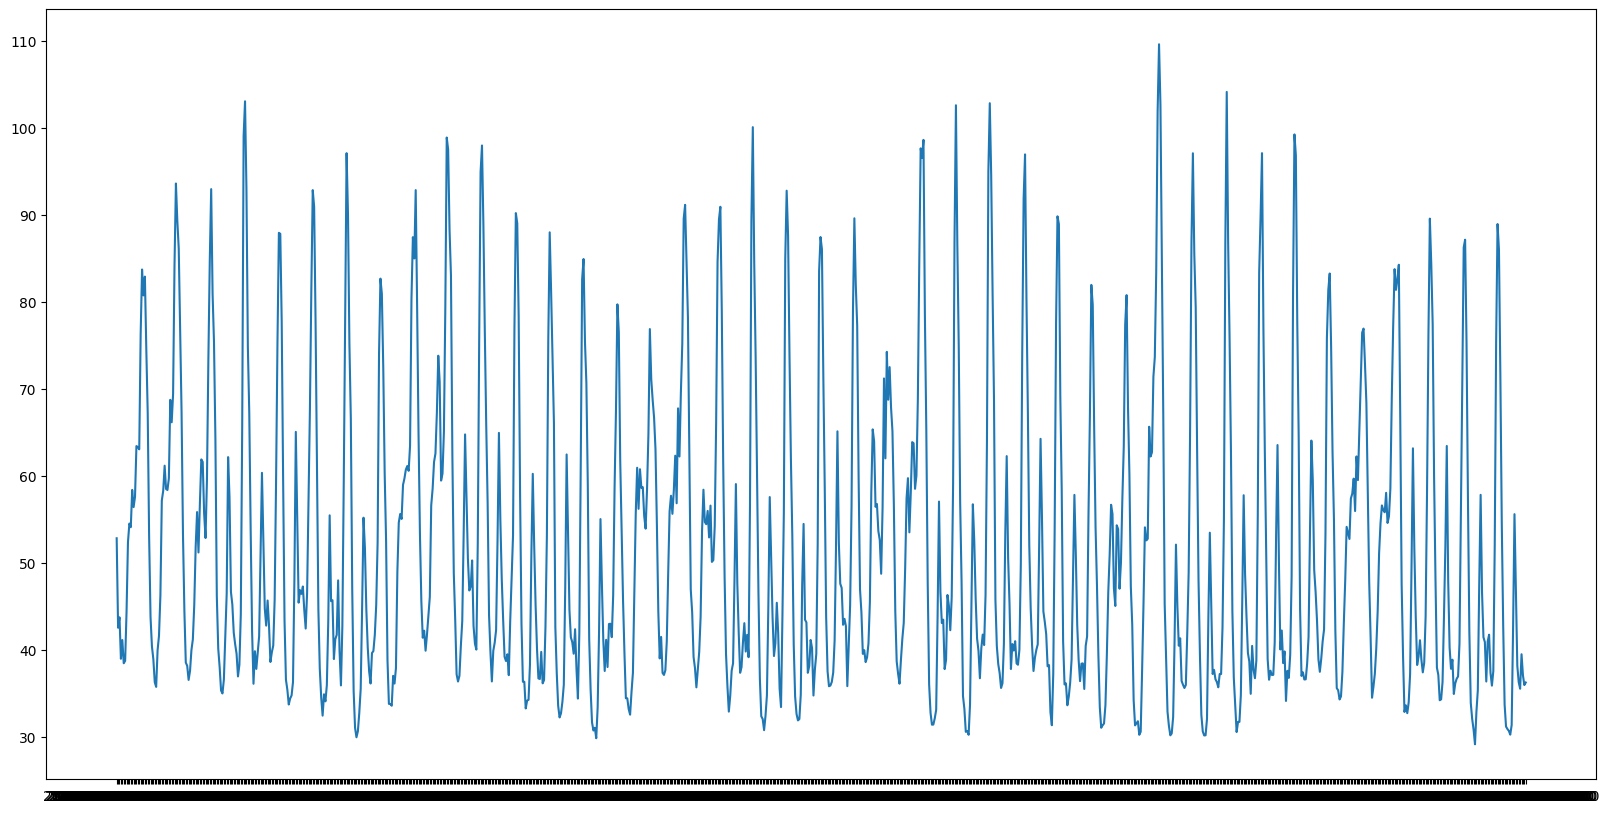

In [7]:
fig = plt.figure(figsize = (20,10))
plt.plot(df.value[:1000])

## Feature Engineering

### Lag features

In [8]:
# lag features
def generate_lags(df:pd.DataFrame, lags:list) -> pd.DataFrame:
    '''
    genearte time lags given specified lag values.
    '''
    df_n = df.copy()
    for n in lags:
        df_n[f"lag{n}"] = df_n["value"].shift(n)
    return df_n

lags = [i+1 for i in range(24)]+ [24*i for i in [2,3,7,8,14]]  

df_generated = generate_lags(df,lags)
df_generated

,value,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag20,lag21,lag22,lag23,lag24,lag48,lag72,lag168,lag192,lag336
2016-01-01 00:00:00,52.838661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 01:00:00,42.563790,52.838661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 02:00:00,43.763188,42.563790,52.838661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 03:00:00,38.996560,43.763188,42.563790,52.838661,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 04:00:00,41.146466,38.996560,43.763188,42.563790,52.838661,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-19 19:00:00,114.797180,105.550293,69.906738,54.371826,47.579773,44.121277,41.195801,40.389893,37.180176,35.495789,...,52.030457,65.841064,78.661255,84.837524,97.845215,97.373535,80.159668,85.913818,151.464355,96.407471
2016-04-19 20:00:00,108.977539,114.797180,105.550293,69.906738,54.371826,47.579773,44.121277,41.195801,40.389893,37.180176,...,39.227600,52.030457,65.841064,78.661255,84.837524,84.340576,93.112122,79.724365,137.011230,91.604614
2016-04-19 21:00:00,110.336060,108.977539,114.797180,105.550293,69.906738,54.371826,47.579773,44.121277,41.195801,40.389893,...,35.992554,39.227600,52.030457,65.841064,78.661255,85.804688,85.983765,71.112183,116.196411,76.968628
2016-04-19 22:00:00,83.884888,110.336060,108.977539,114.797180,105.550293,69.906738,54.371826,47.579773,44.121277,41.195801,...,36.391541,35.992554,39.227600,52.030457,65.841064,72.126038,79.486816,61.786804,95.737061,68.535156


### Time effects

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
# pd.DataFrame.assign: return copy()
df_features = (df
                .assign(hour = df.index.hour)
                .assign(day = df.index.day)
                .assign(month = df.index.month)
                .assign(day_of_week = df.index.dayofweek)
              )
df_features

,value,hour,day,month,day_of_week
2016-01-01 00:00:00,52.838661,0,1,1,4
2016-01-01 01:00:00,42.563790,1,1,1,4
2016-01-01 02:00:00,43.763188,2,1,1,4
2016-01-01 03:00:00,38.996560,3,1,1,4
2016-01-01 04:00:00,41.146466,4,1,1,4
...,...,...,...,...,...
2016-04-19 19:00:00,114.797180,19,19,4,1
2016-04-19 20:00:00,108.977539,20,19,4,1
2016-04-19 21:00:00,110.336060,21,19,4,1
2016-04-19 22:00:00,83.884888,22,19,4,1


### Holiday effects

In [11]:
# ! pip install holidays

In [12]:
from datetime import date
import holidays

In [13]:
us_holidays = holidays.CountryHoliday('US')  # this is a dict

date(2015, 1, 1) in us_holidays  # True
date(2015, 1, 2) in us_holidays  # False
us_holidays.get('2016-01-01')    

"New Year's Day"

In [14]:
def is_holiday(date):
    date = date.replace(hour = 0)
    return 1 if (date in us_holidays) else 0

def add_holiday_col(df, holidays):
    return df.assign(is_holiday = df.index.to_series().apply(is_holiday))

df_features = add_holiday_col(df_features, us_holidays)
df_features

,value,hour,day,month,day_of_week,is_holiday
2016-01-01 00:00:00,52.838661,0,1,1,4,1
2016-01-01 01:00:00,42.563790,1,1,1,4,1
2016-01-01 02:00:00,43.763188,2,1,1,4,1
2016-01-01 03:00:00,38.996560,3,1,1,4,1
2016-01-01 04:00:00,41.146466,4,1,1,4,1
...,...,...,...,...,...,...
2016-04-19 19:00:00,114.797180,19,19,4,1,0
2016-04-19 20:00:00,108.977539,20,19,4,1,0
2016-04-19 21:00:00,110.336060,21,19,4,1,0
2016-04-19 22:00:00,83.884888,22,19,4,1,0


In [15]:
df_features['is_holiday'].value_counts()

0    2568
1      72
Name: is_holiday, dtype: int64

### Cyclical features / Fourier terms

Add cyclical features to preserve the daily and weekly trend. Like the seasonality we consider in the time series modeling notebook. We consider daily (n=24) and weekly (n=168) seasonality.

In [16]:
def generate_cyclical_features(df, col_name, period, start_num=0):
    kwargs = {
        f'sin_{col_name}' : lambda x: np.sin(2*np.pi*(df[col_name]-start_num)/period),
        f'cos_{col_name}' : lambda x: np.cos(2*np.pi*(df[col_name]-start_num)/period)    
             }
    return df.assign(**kwargs)

df_features = generate_cyclical_features(df_features, 'hour', 24, 0)
df_features = generate_cyclical_features(df_features, 'day_of_week', 7, 0)

df_features

,value,hour,day,month,day_of_week,is_holiday,sin_hour,cos_hour,sin_day_of_week,cos_day_of_week
2016-01-01 00:00:00,52.838661,0,1,1,4,1,0.000000,1.000000,-0.433884,-0.900969
2016-01-01 01:00:00,42.563790,1,1,1,4,1,0.258819,0.965926,-0.433884,-0.900969
2016-01-01 02:00:00,43.763188,2,1,1,4,1,0.500000,0.866025,-0.433884,-0.900969
2016-01-01 03:00:00,38.996560,3,1,1,4,1,0.707107,0.707107,-0.433884,-0.900969
2016-01-01 04:00:00,41.146466,4,1,1,4,1,0.866025,0.500000,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...
2016-04-19 19:00:00,114.797180,19,19,4,1,0,-0.965926,0.258819,0.781831,0.623490
2016-04-19 20:00:00,108.977539,20,19,4,1,0,-0.866025,0.500000,0.781831,0.623490
2016-04-19 21:00:00,110.336060,21,19,4,1,0,-0.707107,0.707107,0.781831,0.623490
2016-04-19 22:00:00,83.884888,22,19,4,1,0,-0.500000,0.866025,0.781831,0.623490


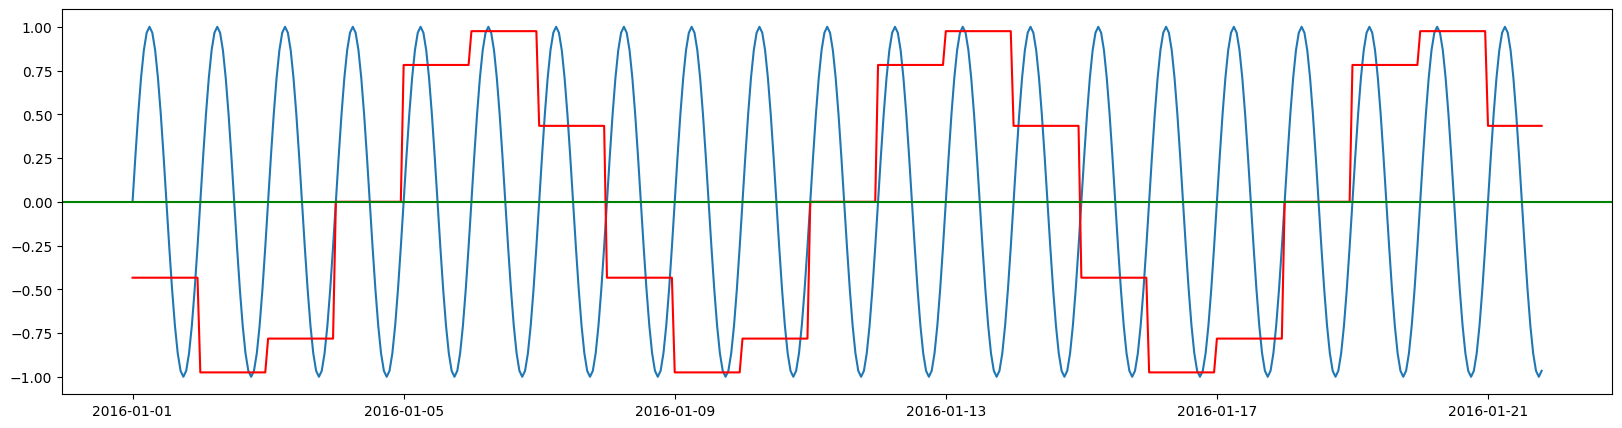

In [17]:
# visualize the generated waves
fig = plt.figure(figsize = (20,5))
plt.plot(df_features.sin_hour[:500])
plt.plot(df_features.sin_day_of_week[:500],'r')
plt.axhline(c='g')

In [18]:
df_generated.index = df_features.index
df = pd.merge(df_generated, df_features.drop('value',axis=1),left_index=True,right_index=True)
print(df.shape)
df.head()

(2640, 39)


,value,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag336,hour,day,month,day_of_week,is_holiday,sin_hour,cos_hour,sin_day_of_week,cos_day_of_week
2016-01-01 00:00:00,52.838661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1,1,4,1,0.000000,1.000000,-0.433884,-0.900969
2016-01-01 01:00:00,42.563790,52.838661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,4,1,0.258819,0.965926,-0.433884,-0.900969
2016-01-01 02:00:00,43.763188,42.563790,52.838661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,1,1,4,1,0.500000,0.866025,-0.433884,-0.900969
2016-01-01 03:00:00,38.996560,43.763188,42.563790,52.838661,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3,1,1,4,1,0.707107,0.707107,-0.433884,-0.900969
2016-01-01 04:00:00,41.146466,38.996560,43.763188,42.563790,52.838661,NaN,NaN,NaN,NaN,NaN,...,NaN,4,1,1,4,1,0.866025,0.500000,-0.433884,-0.900969


In [19]:
# drop rows with NA values
df = df[df.apply(lambda x:x.isna().sum() ,axis=1) == 0]
df.head()

,value,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,...,lag336,hour,day,month,day_of_week,is_holiday,sin_hour,cos_hour,sin_day_of_week,cos_day_of_week
2016-01-15 00:00:00,35.484877,41.265786,59.074398,70.686138,75.424599,84.916929,82.614249,61.120305,41.974054,34.425387,...,52.838661,0,15,1,4,0,0.000000,1.000000,-0.433884,-0.900969
2016-01-15 01:00:00,31.696746,35.484877,41.265786,59.074398,70.686138,75.424599,84.916929,82.614249,61.120305,41.974054,...,42.563790,1,15,1,4,0,0.258819,0.965926,-0.433884,-0.900969
2016-01-15 02:00:00,30.753835,31.696746,35.484877,41.265786,59.074398,70.686138,75.424599,84.916929,82.614249,61.120305,...,43.763188,2,15,1,4,0,0.500000,0.866025,-0.433884,-0.900969
2016-01-15 03:00:00,31.072069,30.753835,31.696746,35.484877,41.265786,59.074398,70.686138,75.424599,84.916929,82.614249,...,38.996560,3,15,1,4,0,0.707107,0.707107,-0.433884,-0.900969
2016-01-15 04:00:00,29.868764,31.072069,30.753835,31.696746,35.484877,41.265786,59.074398,70.686138,75.424599,84.916929,...,41.146466,4,15,1,4,0,0.866025,0.500000,-0.433884,-0.900969


Now we have obtained a dataframe consisting of lagging values, day attribute and cyclic trend. There are a few tasks that should be done before training NN models:

* prepare train/test/val sets
* scaling
* write data loader

### Splitting data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
def feature_label_split(df, target_col):
    y = df[[target_col]]
    X = df.drop(columns=[target_col])
    return X, y

def train_val_test_split(df, target_col, test_ratio):
    val_ratio = test_ratio / (1 - test_ratio)
    X, y = feature_label_split(df, target_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio, shuffle=False)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(df, 'value', 0.2)
print(X_train.shape, X_val.shape, X_test.shape)

(1382, 38) (461, 38) (461, 38)


In [22]:
X_train.head()

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,...,lag336,hour,day,month,day_of_week,is_holiday,sin_hour,cos_hour,sin_day_of_week,cos_day_of_week
2016-01-15 00:00:00,41.265786,59.074398,70.686138,75.424599,84.916929,82.614249,61.120305,41.974054,34.425387,37.782540,...,52.838661,0,15,1,4,0,0.000000,1.000000,-0.433884,-0.900969
2016-01-15 01:00:00,35.484877,41.265786,59.074398,70.686138,75.424599,84.916929,82.614249,61.120305,41.974054,34.425387,...,42.563790,1,15,1,4,0,0.258819,0.965926,-0.433884,-0.900969
2016-01-15 02:00:00,31.696746,35.484877,41.265786,59.074398,70.686138,75.424599,84.916929,82.614249,61.120305,41.974054,...,43.763188,2,15,1,4,0,0.500000,0.866025,-0.433884,-0.900969
2016-01-15 03:00:00,30.753835,31.696746,35.484877,41.265786,59.074398,70.686138,75.424599,84.916929,82.614249,61.120305,...,38.996560,3,15,1,4,0,0.707107,0.707107,-0.433884,-0.900969
2016-01-15 04:00:00,31.072069,30.753835,31.696746,35.484877,41.265786,59.074398,70.686138,75.424599,84.916929,82.614249,...,41.146466,4,15,1,4,0,0.866025,0.500000,-0.433884,-0.900969


In [23]:
X_test.index.min(),X_test.index.max()   # For comparison between models, use predicted values from 2016-04-01 00:00:00 to 2016-04-19 23:00:00

(Timestamp('2016-03-31 19:00:00'), Timestamp('2016-04-19 23:00:00'))

### Scaling

Scaling is important for neural network. It speeds up the learning by making it easier for the model to update the weights stably. For the sequence data in the task, standardization(i.e., min-max scaling) is a good choice.

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_arr = scaler.fit_transform(X_train)
X_val_arr = scaler.transform(X_val)
X_test_arr = scaler.transform(X_test)

y_train_arr = scaler.fit_transform(y_train)
y_val_arr = scaler.transform(y_val)
y_test_arr = scaler.transform(y_test)

In [25]:
X_test_arr

array([[1.05948582e+00, 8.69915185e-01, 6.12627254e-01, ...,
        6.29409523e-01, 7.22520934e-01, 5.55111512e-17],
       [1.22595098e+00, 1.05948582e+00, 8.69915185e-01, ...,
        7.50000000e-01, 7.22520934e-01, 5.55111512e-17],
       [1.28387746e+00, 1.22595098e+00, 1.05948582e+00, ...,
        8.53553391e-01, 7.22520934e-01, 5.55111512e-17],
       ...,
       [9.92648521e-01, 1.06346136e+00, 9.50946115e-01, ...,
        8.53553391e-01, 9.00968868e-01, 8.01937736e-01],
       [1.00917887e+00, 9.92648521e-01, 1.06346136e+00, ...,
        9.33012702e-01, 9.00968868e-01, 8.01937736e-01],
       [6.87323517e-01, 1.00917887e+00, 9.92648521e-01, ...,
        9.82962913e-01, 9.00968868e-01, 8.01937736e-01]])

### Data loader
Instead of producing slices using numpy, we use built-in PyTorch methods called *DataLoaders*

In [26]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
batch_size = 64

train_features = torch.Tensor(X_train_arr)
train_targets = torch.Tensor(y_train_arr)
val_features = torch.Tensor(X_val_arr)
val_targets = torch.Tensor(y_val_arr)
test_features = torch.Tensor(X_test_arr)
test_targets = torch.Tensor(y_test_arr)

train = TensorDataset(train_features, train_targets)
val = TensorDataset(val_features, val_targets)
test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)

## Model Training
### Define models

In [28]:
# RNN
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(RNNModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim   

        # RNN layers
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)
        return out

In [29]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(LSTMModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        # Forward propagation by passing in the input, hidden state, and cell state into the model
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

In [30]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(GRUModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.layer_dim = layer_dim
        self.hidden_dim = hidden_dim

        # GRU layers
        self.gru = nn.GRU(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
 
        out, _ = self.gru(x, h0.detach())  # Forward propagation
        out = out[:, -1, :]
        out = self.fc(out)

        return out

In [31]:
def get_model(model, model_params):
    models = {
        "rnn": RNNModel,
        "lstm": LSTMModel,
        "gru": GRUModel,
    }
    return models.get(model.lower())(**model_params)

### Training Framework
Training a neural network entails a lot of repetitive work (forward/backward propogation).   
We can write a train step function or wrapper, to combine these repetitive steps.

In [32]:
# Define training step
class Optimization:
    def __init__(self, model, loss_fn, optimizer):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
        
    def train_step(self,x,y):
        self.model.train()  # train model
        yhat = self.model(x)   # make predictions
        loss = self.loss_fn(y, yhat)  # compute loss
        loss.backward()   # compute gradients
        self.optimizer.step()  # update parameters
        self.optimizer.zero_grad()  # set gradient to zero
        
        return loss.item()  # return loss
    
    # Write training loop.
    def train(self, train_loader, val_loader, batch_size=64, n_epochs=50, n_features=1):
        
        w_dir = os.getcwd()
        model_path = f'{w_dir}/{self.model}_{datetime.now().strftime("%Y-%m-%d %H:%M:%S")}'

        for epoch in range(1,n_epochs+1):
            batch_losses = []     # record loss for all batches in the current epoch
            for x_batch, y_batch in train_loader:
                x_batch = x_batch.view([batch_size,-1,n_features]).to(device)
                y_batch = y_batch.to(device)
                loss = self.train_step(x_batch,y_batch)
                batch_losses.append(loss)
            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)

            with torch.no_grad():      
                batch_val_losses = []
                for x_val,y_val in val_loader:
                    x_val = x_val.view([batch_size,-1,n_features]).to(device)
                    y_val = y_val.to(device)
                    self.model.eval()
                    yhat = self.model(x_val)
                    val_loss = self.loss_fn(y_val, yhat).item()
                    batch_val_losses.append(val_loss)
                validation_loss = np.mean(batch_val_losses)
                self.val_losses.append(validation_loss)
            
            if (epoch <= 10) | (epoch %50 == 0):
                print(
                    f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}  "
                )

        torch.save(self.model.state_dict(), model_path)   

    
    # function to evaluate test set
    def evaluate(self, test_loader, batch_size=1, n_features=1):
        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)
                predictions.append(yhat.to(device).detach().numpy())
                values.append(y_test.to(device).detach().numpy())
        return predictions, values
    
    def plot_losses(self):
        plt.plot(self.train_losses, label='Training loss')
        plt.plot(self.val_losses, label='Validation loss')
        plt.legend()
        plt.title('Losses')

In [33]:
## Tutorial: torch.no_grad()
# The requires_grad attribute will be set False under the torch.no_grad() module
# demo:
x = torch.randn(10,5,requires_grad=True)
y = torch.randn(10,5,requires_grad=True)
z = torch.randn(10,5,requires_grad=True)

a = x + y + z
print(a.requires_grad)
print(a.grad_fn)

with torch.no_grad():
    w = x + y + z
    print(w.requires_grad)
    print(w.grad_fn)

True
False
None


[1/200] Training loss: 0.0653	 Validation loss: 0.0406  
[2/200] Training loss: 0.0250	 Validation loss: 0.0207  
[3/200] Training loss: 0.0107	 Validation loss: 0.0102  
[4/200] Training loss: 0.0059	 Validation loss: 0.0100  
[5/200] Training loss: 0.0054	 Validation loss: 0.0097  
[6/200] Training loss: 0.0051	 Validation loss: 0.0096  
[7/200] Training loss: 0.0049	 Validation loss: 0.0095  
[8/200] Training loss: 0.0048	 Validation loss: 0.0093  
[9/200] Training loss: 0.0047	 Validation loss: 0.0092  
[10/200] Training loss: 0.0046	 Validation loss: 0.0090  
[50/200] Training loss: 0.0031	 Validation loss: 0.0055  
[100/200] Training loss: 0.0025	 Validation loss: 0.0051  
[150/200] Training loss: 0.0021	 Validation loss: 0.0040  
[200/200] Training loss: 0.0020	 Validation loss: 0.0045  


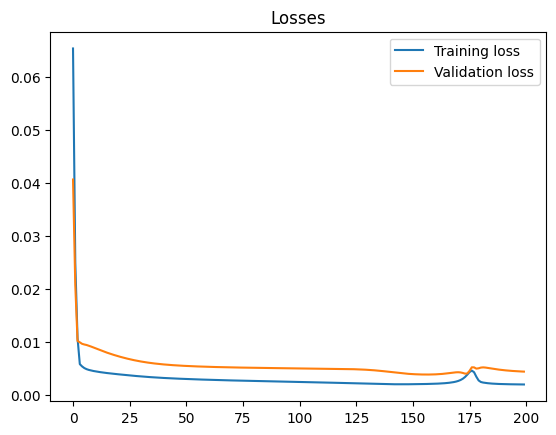

In [37]:
from datetime import time,datetime
import torch.optim as optim

device = torch.device('cpu')

input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 1
batch_size = 64
dropout = 0.2
n_epochs = 200
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('lstm', model_params)

loss_fn = nn.MSELoss(reduction = "mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)

opt.plot_losses()

In [38]:
predictions, values = opt.evaluate(test_loader, batch_size=batch_size, n_features=input_dim)

def inverse_transform(scaler, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df

def format_predictions(predictions, values, df_test, scaler):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    df_result = pd.DataFrame(data={"value": vals, "prediction": preds}, index=df_test.head(len(vals)).index)
    df_result = df_result.sort_index()
    df_result = inverse_transform(scaler, df_result, [["value", "prediction"]])
    return df_result

df_result = format_predictions(predictions, values, X_test, scaler)
df_result

,value,prediction
2016-03-31 19:00:00,128.151138,113.641991
2016-03-31 20:00:00,132.911728,110.477875
2016-03-31 21:00:00,118.487518,106.026955
2016-03-31 22:00:00,88.402206,91.594353
2016-03-31 23:00:00,61.695404,65.680092
...,...,...
2016-04-19 06:00:00,40.709473,44.762085
2016-04-19 07:00:00,49.435299,51.266205
2016-04-19 08:00:00,44.951664,50.484749
2016-04-19 09:00:00,37.019409,44.397972


In [39]:
from sklearn.metrics import mean_absolute_percentage_error as mape

MAPE: 0.10289451
accuracy: 89.71%


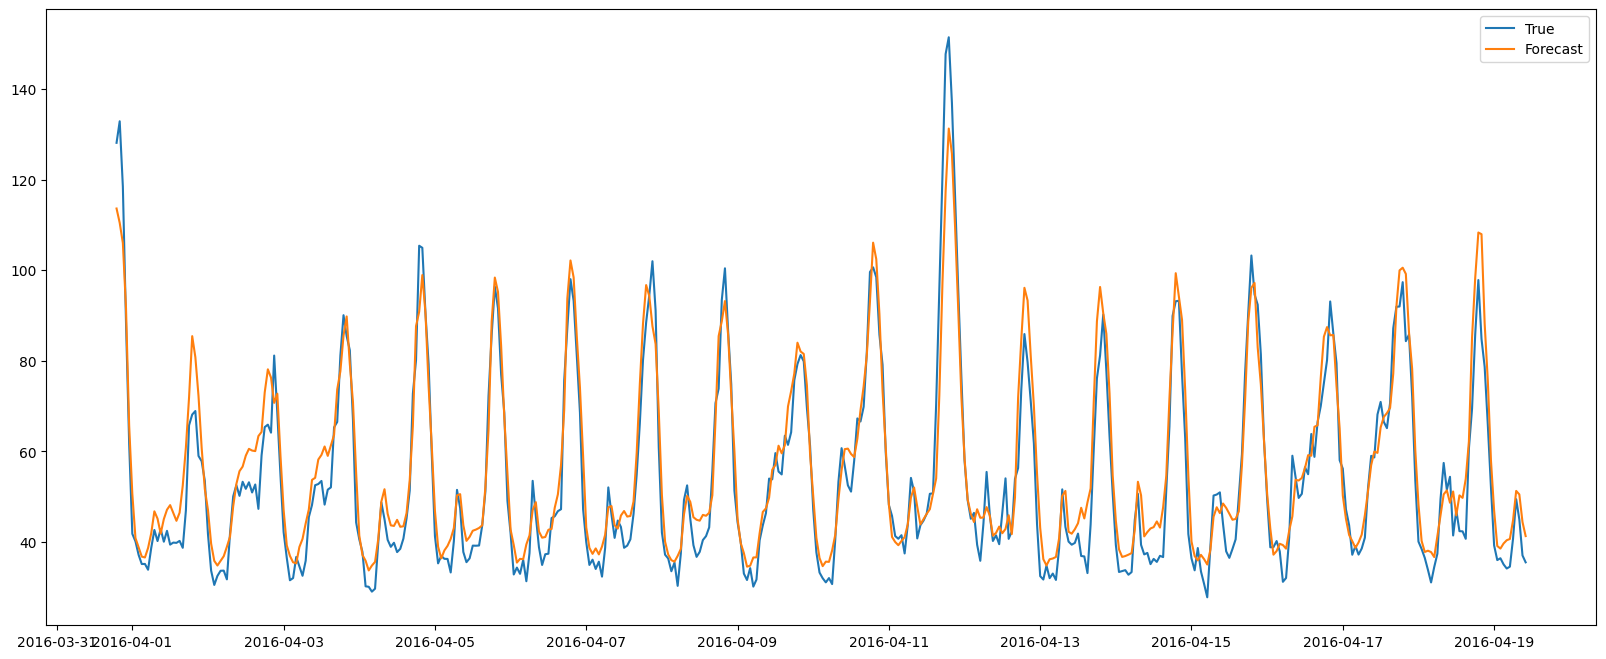

In [40]:
def plot_forecast(true,pred,figsize):
    fig = plt.figure(figsize = figsize)
    plt.plot(true, label='True')
    plt.plot(pred, label='Forecast')
    plt.legend()
    
def print_metric(true,pred):
    m = mape(true,pred)
    print('MAPE:', m)
    print('accuracy: {:.2f}%'.format((1-m)*100))

plot_forecast(df_result.value, df_result.prediction,(20,8))
print_metric(df_result.value, df_result.prediction)

In [41]:
true = df_result.value
pred = df_result.prediction
mape(true,pred)

0.10289451

In [42]:
pred.to_csv('result_NN_{}.csv'.format(k))
# pred.to_csv('result_NN_baseline.csv') # prediction without clusters (on all data)